# 專案⽬目標：  
任選  Cupoy  新聞服務之某⼀一種分類  ( 如熱⾨門新聞、科技、商業 ....) ，使⽤用你學習過的爬蟲程式，爬取前  500  篇的⽂文章：  
https://www.cupoy.com/newsfeed/topicgrp/tech_tw  


# 基本⽬目標  
## Target 1  
透過開發者⼯工具觀察網站屬於<font color=blue>動態網站</font>，因為下滑滑鼠或按 scroll bar 向下捲頁時，requests 的數量不停增加，由此可知此網頁屬於動態網站。  
  
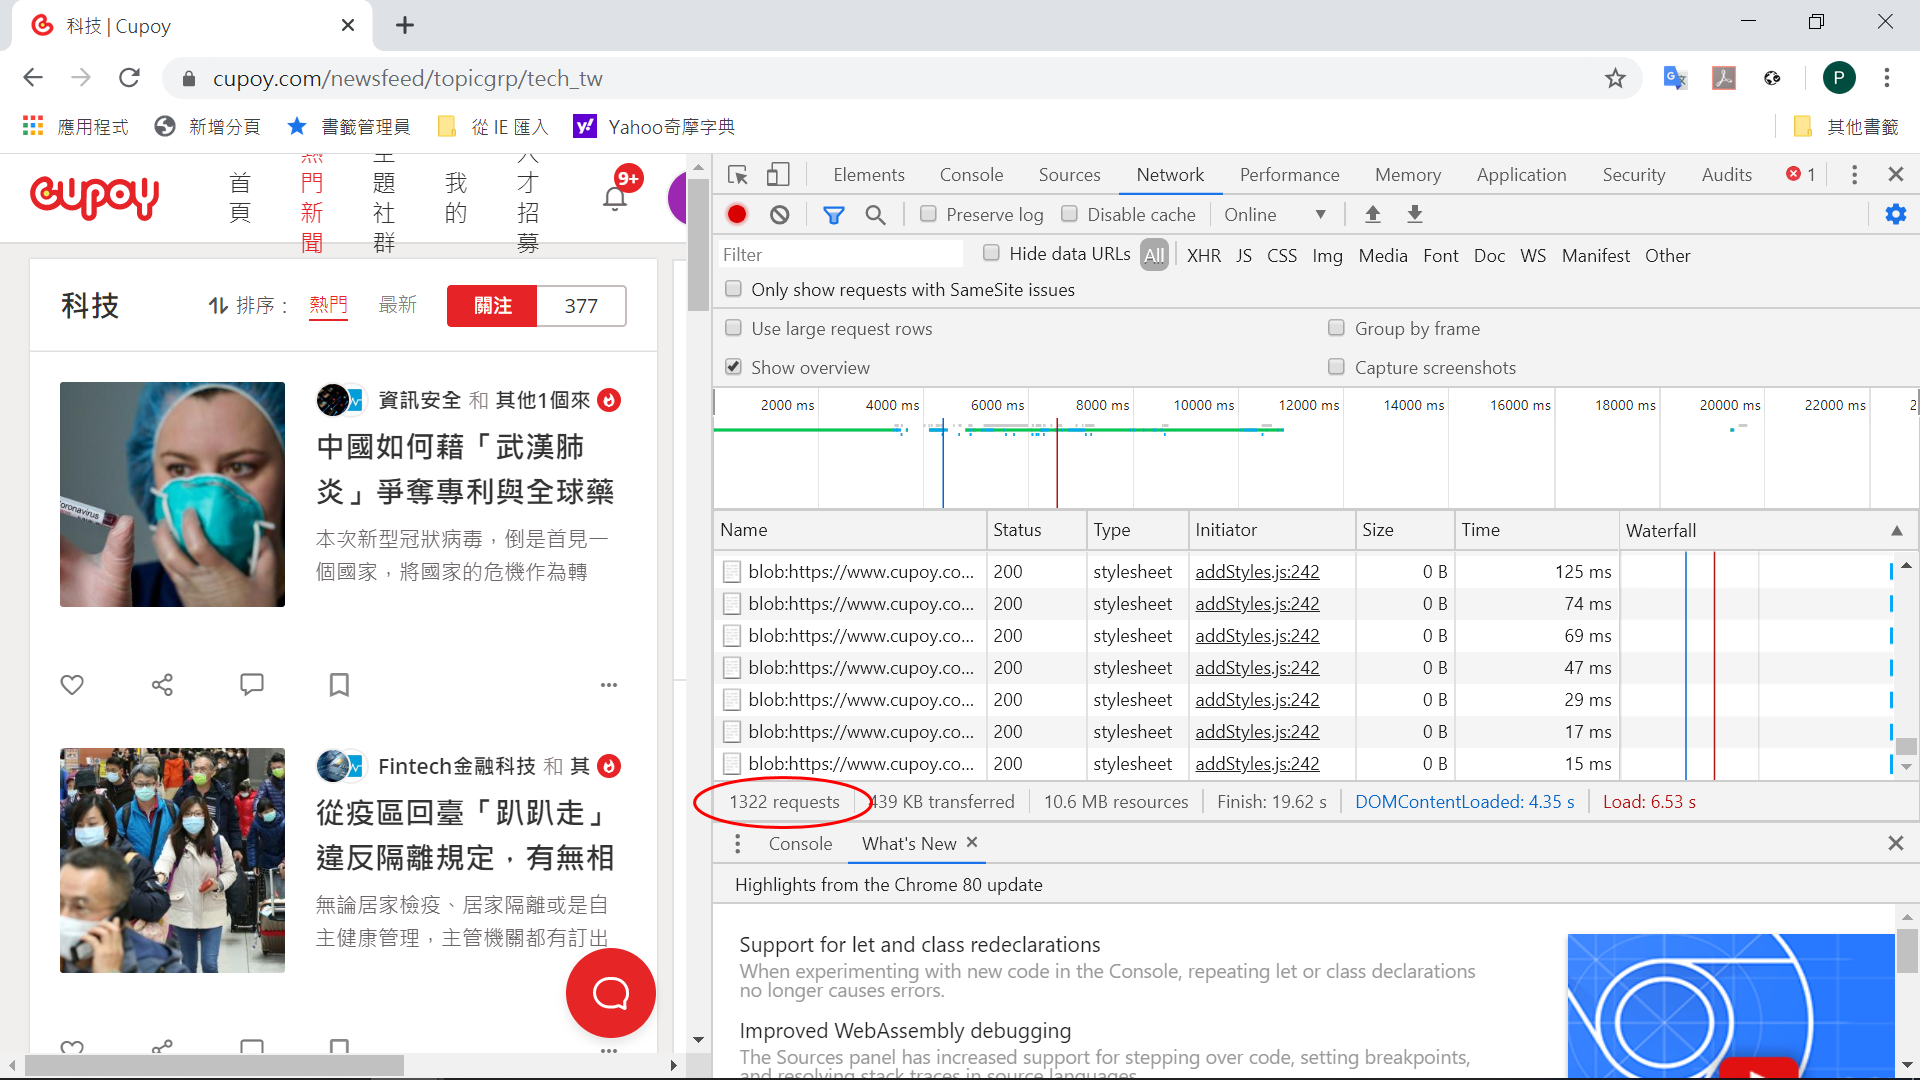
  

  

  
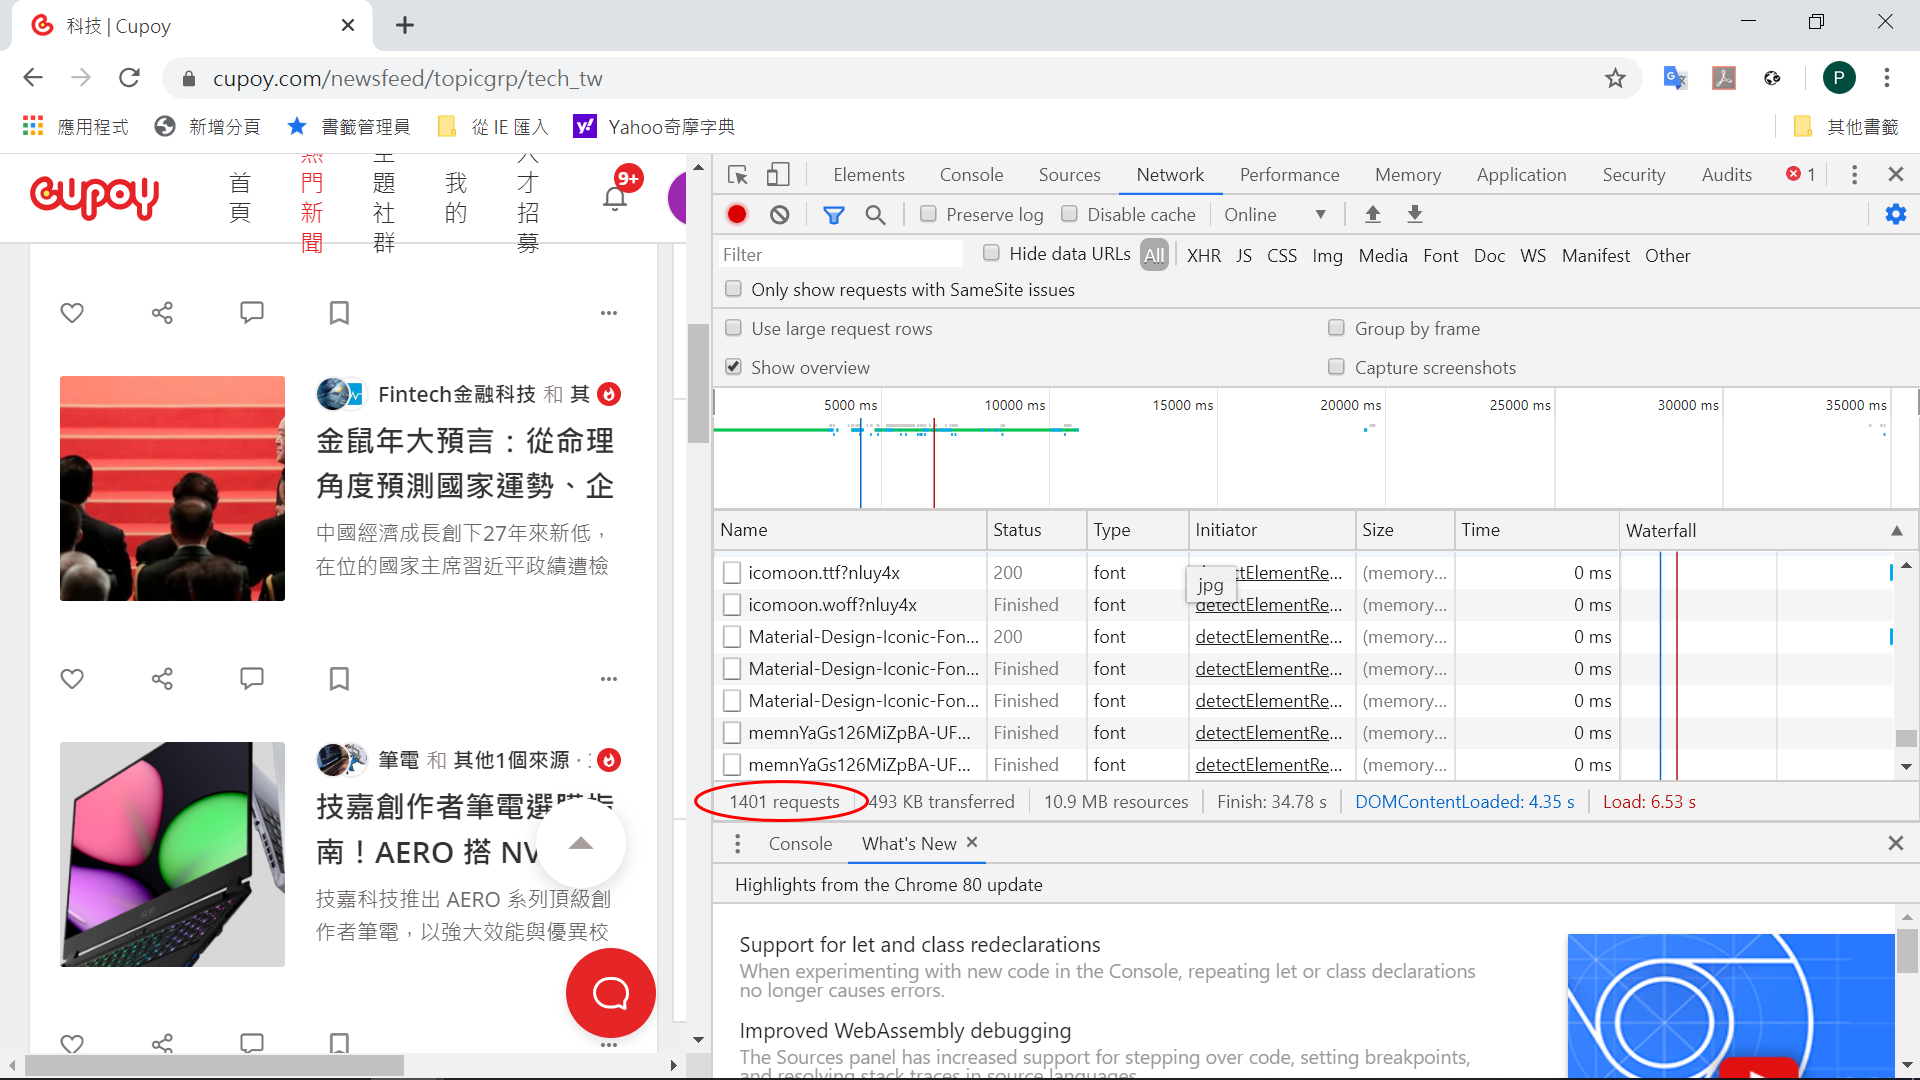

## Target 2  
根據網站特性選擇 requests / BeautifulSoup / selenium 等⼯工具進⾏行行爬蟲整理理 

In [1]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

import pandas as pd

In [2]:
url = "https://www.cupoy.com/newsfeed/topicgrp/tech_tw"  # tech news

### Use Selenium to simulate behaviors of browser and collect news

In [3]:
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get(url)  # open browser and link to targeted url

In [4]:
SCROLL_PAUSE_TIME = 6

time.sleep(SCROLL_PAUSE_TIME)

#
# simulate scorll down and update web pages
#

columns = ['No.', 'Title', 'url', 'Classification', 'brief']
news_list = pd.DataFrame(columns = columns)
news_counter = 0

'''
refer to: 
https://stackoverflow.com/questions/48850974/selenium-scroll-to-end-of-page-indynamically-loading-webpage/48851166
'''
last_height = 0
while True:
    # crawl the web content and extract the news
    html = browser.page_source
    soup = BeautifulSoup(html, "lxml")
    
    #all_news = soup.find("div", attrs={'class':'ReactVirtualized__Grid__innerScrollContainer'})
    news_block = soup.find_all('div', attrs={'class':'sc-eEieub sc-iuDHTM ibJqYc'})
    
    for i, news in enumerate(news_block):
        news_item = []
        news_body = news.find('a')
        news_title = news_body.get('title')
        news_url = news_body.get('href')
        news_cls = news.find('div', attrs = {'class': 'sc-gacfCG bPSpUf'}).string
        news_brief = news.find('p', attrs = {'class': 'sc-FQuPU sc-ciodno bvnzOw'}).string
        
        if news_title not in list(news_list['Title']):
            news_counter += 1
            news_item.append(f"{news_counter:03}")
            news_item.append(news_title)
            news_item.append(news_url)
            news_item.append(news_cls)
            news_item.append(news_brief)
            
            news_list = news_list.append(pd.DataFrame([news_item], columns = columns),
                                         ignore_index = True)
            
            print("----------------------------------------------------------------------")
            print(f"[{news_counter:03}] {news_title}")
            print(f"news_url: {news_url}")
            print(f"classification: {news_cls}")
            print(f"news_brief: {news_brief}")
            print("----------------------------------------------------------------------")
        
    if news_counter >= 500:
        print("*** 500 articles ***")
        break
    
    # Scroll down a page.
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # browser.execute_script("window.scrollTo(0, 100000);")
    
    # Wait to load the page.
    time.sleep(SCROLL_PAUSE_TIME)
    
    # Calculate new scroll height and compare with last scroll height.
    new_height = browser.execute_script("return document.body.scrollHeight")
    
    print(f"last_height: {last_height}")
    print(f"new_height: {new_height}")

    if new_height == last_height:
        print("*** scroll to the bottom ***")
        break
    print("updating.....")
    last_height = new_height


----------------------------------------------------------------------
[001] 淺談個性化推薦系統中的非採樣學習 | 機器之心
news_url: https://www.jiqizhixin.com/articles/2020-02-19-4
classification: AI與大數據
news_brief: 在近兩年，清華大學信息檢索課題組（THUIR）首次探索了將非採樣策略（Non-Sampling, Whole-data based Learning）應用到基於神經網絡的推薦系統中。
----------------------------------------------------------------------
----------------------------------------------------------------------
[002] 果然萬能，Amazon 工程師開源出 Excel 電腦視覺課程 - INSIDE
news_url: https://www.inside.com.tw/article/18957-computer-vision-basics-in-microsoft-excel-by-Amazon-Engineer
classification: Fintech金融科技
news_brief: 這堂課只要有 Excel 基礎知識即可入手，甚至還能直接從 Excel 中進行人臉辨識、霍夫變換等視覺算法！ 標籤: Amazon, Excel, 電腦視覺
----------------------------------------------------------------------
----------------------------------------------------------------------
[003] SpaceX 攜手太空探險公司，明後年將帶四名旅客搭乘飛龍 2 號上太空 - INSIDE
news_url: https://www.inside.com.tw/article/18954-spacex-tourism-orbit-earth-private-citizens-dragon

last_height: 5565
new_height: 8375
updating.....
----------------------------------------------------------------------
[027] AeyeQ航空母艦級母板，輕鬆為Jetson迷你AI電腦連接多臺網路攝影機 | T客邦
news_url: https://www.techbang.com/posts/76280-aeyeq-aircraft-carrier-class-motherboard-easy-to-connect-multiple-network-cameras-to-jetson-mini-ai-computers
classification: 社交媒體
news_brief: None
----------------------------------------------------------------------
----------------------------------------------------------------------
[028] 開發者網站意外上線，Android 11 將會提供這些功能 | T客邦
news_url: https://www.techbang.com/posts/76226-developers-website-accidentally-goes-live-android-11-may-provide-these-features
classification: Google專區
news_brief: 日前 Android 11 開發者網站的登錄頁面曾經意外上線，比正常情況下的上線時間差不多早了一個月，可惜的是裡面的連結都是不可以用的。不過，從目前看到的內容來看，我們已經可以知道Android...
----------------------------------------------------------------------
----------------------------------------------------------------------
[029] 武漢肺炎影響層面大，新加坡祭出抗疫津貼、減稅政策救經濟 - The News

last_height: 10802
new_height: 13790
updating.....
----------------------------------------------------------------------
[052] 澎湖-大菓葉柱狀玄武岩-欣攝影-欣傳媒攝影頻道
news_url: https://solomo.xinmedia.com/photo/13027-PengHu?utm_source=xinphotofb&utm_medium=fbpost&utm_campaign=xinmedia
classification: Google專區
news_brief: 圖片說明：圖攝/陳曉信(CEO) 提供拍攝點資訊：大菓葉柱狀玄武岩，這片雄偉的玄武岩石壁，是因為海底下溶漿因為地形上升，溶漿冷卻收縮之後，巖體產生的五、六角形的巖柱破裂，這種破裂面舊稱為柱狀節理。
----------------------------------------------------------------------
----------------------------------------------------------------------
[053] 「Fun! 臺股!」浮動看股小工具，隨時都能關注股巿行情（Android） – 重灌狂人
news_url: https://briian.com/65291/
classification: APP應用程式
news_brief: 有在股票巿場裡打滾的朋友，想必都有自己觀看股巿行情的一套方法吧？在手機上的話，大多都是使用下單的 App 來看股，不過就必須一直停留在該 App 畫面無法跳出，如果要使用其它的手機功能，就不能隨時關注。  想要兩全齊美、一心二用的話，可以搭配「Fun! 臺股!」來使用，它是一款浮動小工具，可選入想查...
----------------------------------------------------------------------
----------------------------------------------------------------------
[054] PrintMyFonts 顯示、列印電腦中的全部字型

last_height: 16396
new_height: 19384
updating.....
----------------------------------------------------------------------
[079] 業界情報：新版 iPad Pro 將於 3 月左右推出 - New MobileLife 流動日報
news_url: https://www.newmobilelife.com/2020/02/18/2020-ipad-pro-launch-in-march-rumor/?utm_content=buffercd07f&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer
classification: APP應用程式
news_brief: 近日根據 DigiTimes 報導指出，有來自供應鏈的消息宣稱新款 iPad Pro 會在今年 3 月左右時後推出，並且生產作業已在今年春節前展開。但可能是因為 2019 冠狀病毒病的影響，因此產量的成長相當緩慢，業界人士預估得等到 4 月才有可能達到產品的出貨高峯。
----------------------------------------------------------------------
----------------------------------------------------------------------
[080] 真「大」作　疑似《Final Fantasy VII REMAKE》外包裝曝光所需空間 - New MobileLife 流動日報
news_url: https://www.newmobilelife.com/2020/02/18/final-fantasy-vii-remake-space-requirement-might-leaked/?utm_source=fbpost&utm_medium=fb&utm_campaign=nmlgame
classification: 遊戲情報
news_brief: 眾所期待的《Final Fantasy VII REMAKE》即將於 4 月 10 日在 PS4 平臺正式推出，而在遊戲正式推出之前，你是

last_height: 21994
new_height: 24256
updating.....
----------------------------------------------------------------------
[103] 蘋果「受疫情衝擊」！兩大關鍵因素，Q1 營收恐難達標 | 經理人
news_url: https://www.managertoday.com.tw/articles/view/59241
classification: 蘋果專區
news_brief: 蘋果表示，由於武漢肺炎疫情未見改善，將無法達到本季營收展望數字。因中國復工情況比預期緩慢，iPhone供應受限，而門市也多閉店，供需兩端都受影響。
----------------------------------------------------------------------
----------------------------------------------------------------------
[104] WordPress外掛ThemeGrill Demo Importer可讓駭客清除資料庫，波及20萬網站 | iThome
news_url: https://www.ithome.com.tw/news/135891
classification: 資訊安全
news_brief: 該漏洞波及ThemeGrill Demo Importer 1.3.4到1.6.1版，官方已釋出完成修補的新版
----------------------------------------------------------------------
----------------------------------------------------------------------
[105] 微軟 Office 三合一 Android 手機 app 可以下載啦！ - INSIDE
news_url: https://www.inside.com.tw/article/18948-introducing-office-your-new-go-to-mobile-app
classification: Fintech金融科技
news_br

last_height: 27070
new_height: 29506
updating.....
----------------------------------------------------------------------
[127] 新 13 英吋 MacBook Pro 曝光：搭載 10 奈米處理器，性能大幅提升 | TechNews 科技新報
news_url: https://technews.tw/2020/02/17/new-13-inch-macbook-pro-exposed/?utm_source=fb_tn&utm_medium=facebook
classification: 蘋果專區
近日名叫 _rogame 的網友在 Twitter 爆料，2020 年 13 吋新 MacBook Pro 將搭...0 億美元營收與同期相比下跌 3.45%，今年蘋果或許會在 Mac 業務多下一點工夫。
----------------------------------------------------------------------
----------------------------------------------------------------------
[128] 高端疫苗與美國國衛院合作，開發武漢肺炎疫苗 | TechNews 科技新報
news_url: https://technews.tw/2020/02/17/medigenvac-nih-wuhan-pneumonia-vaccine/?utm_source=fb_tn&utm_medium=facebook
classification: 資訊安全
高端疫苗公告與美國國衛院於 2 月 16 日簽訂合約，將取得美國國衛院開發 2019 年冠狀病毒疾病（COVID-19）候...劑許可申請後，今天公告已與美國國衛院簽約，將合作開發武漢肺炎疫苗。
----------------------------------------------------------------------
----------------------------------------------------------------------
[129] [下載] Kas

last_height: 32464
new_height: 34900
updating.....
----------------------------------------------------------------------
[153] 創業這件事，現在年輕人可能不覺得那麼酷了
news_url: http://sc.piee.pw/QK4H6
classification: 創業
news_brief: 創業這件事，是高風險但收穫經驗極多的一條路。學生時代我們可能都有個創業夢，是什麼讓那些夢碎了呢？
----------------------------------------------------------------------
----------------------------------------------------------------------
[154] 武漢肺炎創造中國「線上奇蹟」！3億人在家辦公、千萬人遠距上課、看病｜數位時代
news_url: https://www.bnext.com.tw/article/56623/remote-work-telework-china-online-learning-medical-service
classification: 職涯
news_brief: 武肺疫情刺激中國的遠端服務商機，除各種企業通訊軟體迎來往常十數倍成長外，網路醫療諮詢、線上課程等服務也都在這樣的大環境下，開啟發展的契機。
----------------------------------------------------------------------
----------------------------------------------------------------------
[155] 光陽砸9億投資Grab，想讓臺灣當「獨角獸醫生」｜數位時代
news_url: https://www.bnext.com.tw/article/56616/grab-kymco-mou
classification: 理財
news_brief: 光陽（KYMCO）和Grab首波合作將瞄準1.1億輛的印尼二輪市場，從雅加達推動共享電動機車服務，未來會前進新加坡、曼谷，逐步擴展至東南

last_height: 37888
new_height: 40497
updating.....
----------------------------------------------------------------------
[179] 機器學習第一步，這是一篇手把手的隨機森林入門實戰 | 機器之心
news_url: https://www.jiqizhixin.com/articles/2020-02-17-12
classification: AI與大數據
news_brief: 到了 2020 年，我們已經能找到很多好玩的機器學習教程。本文則從最流行的隨機森林出發，手把手教你構建一個模型，它的完整流程到底是什麼樣的。
----------------------------------------------------------------------
----------------------------------------------------------------------
[180] AAAI 2020 論文解讀：關於生成模型的那些事 | 機器之心
news_url: https://www.jiqizhixin.com/articles/2020-02-17-11
classification: AI與大數據
news_brief: 提到生成模型，每個人首先要考慮的問題應該都是這兩個——生成什麼，如何生成。本文介紹的三篇論文就包含了三種生成模型（GNN、RL、VAE，即怎麼生成），同時也介紹了這些生成模型各自當前的應用場景（場景圖生成、序列生成、任務型對話生成，即生成什麼）。
----------------------------------------------------------------------
----------------------------------------------------------------------
[181] 南大孵化，南棲仙策獨創AI決策平臺，快速搭建疫情模型 | 機器之心
news_url: https://www.jiqizhixin.com/articles/2020-02-17-10
classification: AI與大數據
news_brie

last_height: 43658
new_height: 46268
updating.....
----------------------------------------------------------------------
[207] │樂天市場│美食試吃部落客同樂會│超過10種超人氣宅配美食與您同享!!│金月笈食餅舖│耳東家│龍虎舒食│花餡愛甜點藝術空間│鮮之食府│明宏拔絲地瓜│禾菓川烘培坊│龍益莊│樂甜澳式手作│酵素豬│和春堂直營店│不一樣水果旗艦店│ – 媽媽經｜專屬於媽媽的網站
news_url: https://mamaclub.com/learn/%e2%94%82%e6%a8%82%e5%a4%a9%e5%b8%82%e5%a0%b4%e2%94%82%e7%be%8e%e9%a3%9f%e8%a9%a6%e5%90%83%e9%83%a8%e8%90%bd%e5%ae%a2%e5%90%8c%e6%a8%82%e6%9c%83%e2%94%82%e8%b6%85%e9%81%8e10%e7%a8%ae%e8%b6%85%e4%ba%ba/
classification: 美食
news_brief: 收藏文章 │這次很高興能受到樂天市場的邀請，來參加這次的美食部落客同樂會。現場集合超過10種超人氣宅配美食，真 …
----------------------------------------------------------------------
----------------------------------------------------------------------
[208] 自創品牌如何迎戰大廠？「她」化憤怒為創業動力，打造賣進Google總部的飲品
news_url: https://meet.bnext.com.tw/articles/view/45959
classification: 創業
news_brief: Hint Water是源自舊金山的品牌，創辦人Kara Goldin本來想把公司賣掉，卻被潛在買家的一句話惹怒，讓Hint成為指標性的健康飲料品牌。
-------------------------------------------------------------------

last_height: 48518
new_height: 51298
updating.....
----------------------------------------------------------------------
[234] OPPO 自主品牌智慧手錶再曝光，打造移動設備家族系產品 - Yahoo奇摩新聞
news_url: https://tw.news.yahoo.com/oppo-%E8%87%AA%E4%B8%BB%E5%93%81%E7%89%8C%E6%99%BA%E6%85%A7%E6%89%8B%E9%8C%B6%E5%86%8D%E6%9B%9D%E5%85%89-%E6%89%93%E9%80%A0%E7%A7%BB%E5%8B%95%E8%A8%AD%E5%82%99%E5%AE%B6%E6%97%8F%E7%B3%BB%E7%94%A2%E5%93%81-175600778.html
classification: 3C產品
news_brief: OPPO 已經不是光會做智能手機的產商了。除了耳機等外設產品，OPPO 將補足智慧手錶這個缺口。根據其副總裁的最新微博爆料，等於官方確認了這款產品即將上市。 實際上我們不止一次看
----------------------------------------------------------------------
----------------------------------------------------------------------
[235] 激發孩子創意　用行動裝置蓋城堡《Castle Blocks》限時免費 - New MobileLife 流動日報
news_url: https://www.newmobilelife.com/2020/02/18/iphone-ipad-free-app-castle-blocks/
classification: 蘋果專區
news_brief: 《Castle Blocks》是一款提供給孩童遊玩的創意教育 App，它提供了多種不同的建築風格，可以讓孩童在裝置上隨意地發揮創意來建造各式各樣的城堡，並藉此來激發他們的想像力。
-------------------------------------

last_height: 53729
new_height: 56717
updating.....
----------------------------------------------------------------------
[256] 消毒抗武漢肺炎？先瞭解酒精漂白水怎麼用才安全有效 - PanSci 泛科學
news_url: https://pansci.asia/archives/180010
classification: 資訊安全
news_brief: 該怎麼做才能安全有效地殺滅「新型冠狀病毒」？本文針對日常生活中比較容易取得與使用的「酒精」與「漂白水」，介紹如何泡製正確濃度，以及消毒時應該小心的注意事項。
----------------------------------------------------------------------
----------------------------------------------------------------------
[257] 遠傳助攻臺電，24萬智慧電表通訊模組啟動建置 | T客邦
news_url: https://www.techbang.com/posts/76169-far-distance-assistance-station-power-240000-smart-meter-communication-module-start-up
classification: 物聯網
news_brief: 支持政府智慧電網政策，遠傳電信繼先前協助臺電建置智慧型電表資料管理系統（MDMS），今年啟動涵蓋臺北市、新北市、臺中市、彰化縣、雲林縣、澎湖縣、連江縣（馬祖）等6縣市部份地區，合計共約24萬戶 ...
----------------------------------------------------------------------
----------------------------------------------------------------------
[258] 評估企業體質十大要點：如何知道投資的公司是不是「燒錢慘業」？ - The News Lens 關鍵評論網
news_url: https://www.thenewsle

last_height: 59153
new_height: 62141
updating.....
----------------------------------------------------------------------
[282] 如何用 Google 免費工具打造快速的 OCR 無紙化工作流程？
news_url: https://www.playpcesor.com/2020/02/google-ocr.html
classification: Google專區
news_brief: 分享各種行動工作技巧、雲端生活應用，善用數位工具改變你我的工作效率與生活品質。
----------------------------------------------------------------------
----------------------------------------------------------------------
[283] OPPO Find X2可能會推出Pro版本 加強相機拍攝功能 (151806) - 癮科技 Cool3c
news_url: https://www.cool3c.com/article/151806
classification: 3C產品
news_brief: Mash Yang發佈OPPO Find X2可能會推出Pro版本 加強相機拍攝功能，留言0篇於2020-02-18 20:46，0位看過(超級熱門)：OPPO預期在Find X2Pro版本將會進一步加強相機拍攝功能，有可能採用可拍攝更遠距離的潛望式長焦鏡頭模組，以及全畫素全向對焦技術，而感光元件更...
----------------------------------------------------------------------
----------------------------------------------------------------------
[284] 蘋果降財測 本季營收可能連低標都達不到 | 財訊- 掌握趨勢  投資未來 | 最懂投資的財經媒體
news_url: https://www.wealth.com.tw/home/articles/24337?utm_source

last_height: 64751
new_height: 67913
updating.....
----------------------------------------------------------------------
[306] DJ Audio Editor 8.0.0.0 - 音樂錄製編輯軟體        -         阿榮福利味 - 免費軟體下載
news_url: https://www.azofreeware.com/2020/02/dj-audio-editor.html
classification: APP應用程式
news_brief: 音樂錄製編輯軟體 - DJ Audio Editor，可以剪切、合併、分割、修剪、刪除部份、混合聲音檔，從任何輸入來源錄製聲音或音樂，輕鬆套用多種濾鏡及效果，支援多種影音格式，編輯音樂標籤及更新歌曲資訊功能，將影片轉檔為音樂檔（從影片中擷取聲音檔）。（ 阿榮 ）（ 下載 ）（ ...
----------------------------------------------------------------------
----------------------------------------------------------------------
[307] Verizon 開設倫敦 5G 實驗室和工作室 - UNWIRE.PRO
news_url: https://unwire.pro/2020/02/18/verizon-3/ict/
classification: 虛擬實境
news_brief: 近日 5G 再掀起話題，全球多間電訊供應商及基站供應商開始透露更多有關推出 5G 商用時間表及資料，而 Ver …
----------------------------------------------------------------------
----------------------------------------------------------------------
[308] OPPO Sans 可商用字體免費下載 ：粗體、特黑體、中黑體、標準體、細體等 5 種字重可使用
news_url: https://www.kocpc.com

last_height: 70519
new_height: 72781
updating.....
----------------------------------------------------------------------
[332] 夏普首推最高規格 5G 智慧手機 AQUOS R5G！採用 S865 + 4K Pro IGZO 螢幕 + 8K 拍攝支援 – 3C 達人廖阿輝
news_url: https://ahui3c.com/63074/aquos-r5g
classification: 手機平板
news_brief: 「2/17日本訊」夏普於日本發佈2020年第一季上市的5G智慧旗艦機種「AQUOS R5G」，為日系品牌中第一家推出5G手機的公司。運用5G傳輸技術高頻寬、低延遲、傳輸速度快等特點，達到可在幾秒鐘下載大容量的影片，並可以將相機拍攝的影片快速上傳到雲端。https://www.youtube.com/watch?v=i6
----------------------------------------------------------------------
----------------------------------------------------------------------
[333] Taiwan Is Opening A Giant AI-Focused Business Park
news_url: https://www.forbes.com/sites/ralphjennings/2020/01/27/taiwan-is-opening-a-giant-ai-focused-business-park/#1c9fbfe6c08a
classification: AI與大數據
news_brief: The government of Hsinchu County, near Taipei, will open a 126,000-square-meter AI business park near one of Taiwan’s major all-purpose high-tech zones and two top universities.
-------------------

----------------------------------------------------------------------
[349] 重量級人工智慧專家李飛飛：我希望AI保持謙卑...｜天下雜誌
news_url: https://www.cw.com.tw/article/article.action?id=5094476&template=transformers&utm_source=fb_cw&utm_medium=social&utm_campaign=fb_cw-social-daily-200217
classification: 職涯
news_brief: 人類正站在歷史轉捩點，我們即將創造出一種徹底改變未來生活和工作方式的科技。但有幾個迷思必須要破解：AI不會取代人類，而且仍剛起步，並非萬能，會出錯、有偏見。
----------------------------------------------------------------------
----------------------------------------------------------------------
[350] iOS 應用小技巧 ：四項快速撥打電話的祕訣教學
news_url: https://www.kocpc.com.tw/archives/306329
classification: 蘋果專區
news_brief: 八成以上的果粉不知道的使用技巧
----------------------------------------------------------------------
----------------------------------------------------------------------
[351] 人工智能與數據分析有助應對極端氣候變化 - UNWIRE.PRO
news_url: https://unwire.pro/2020/02/16/columnist-49/news/
classification: 趨勢與策略
news_brief: 氣候變化導致極端天氣愈見頻繁，相關的天災對人類造成極大的威脅。根據統計，單在 2019 年上半年，全球已有超過 …
---------------

last_height: 78000
new_height: 80958
updating.....
----------------------------------------------------------------------
[369] 簡立峯博士自Google臺灣退休後 宣佈以獨立董事身分加入Appier及iKala董事會 (151634) - 癮科技 Cool3c
news_url: https://www.cool3c.com/article/151634
classification: 趨勢與策略
news_brief: Mash Yang發佈簡立峯博士自Google臺灣退休後 宣佈以獨立董事身分加入Appier及iKala董事會，留言0篇於2020-02-11 13:20，0位看過(熱門)：包含Appier與iKala目前都是主打結合人工智慧技術應用，以及巨量數據分析，因此預期能與簡立峯博士能有更深層合作，藉此推動...
----------------------------------------------------------------------
----------------------------------------------------------------------
[370] Arm Cortex-M55、Ethos-U55 NPU架構發表 嵌入式裝置也能用AI加速運算 (151633) - 癮科技 Cool3c
news_url: https://www.cool3c.com/article/151633
classification: AI與大數據
news_brief: Mash Yang發佈Arm Cortex-M55、Ethos-U55 NPU架構發表 嵌入式裝置也能用AI加速運算，留言0篇於2020-02-11 13:18，0位看過(超級熱門)：Arm目前兩款架構設計已經確定與亞馬遜、Alif Semiconductor、恆玄科技 (Bestechnic)、賽...
----------------------------------------------------------------------
-------------------------------------------

----------------------------------------------------------------------
[391] 为什么谷歌认为人工智能需要监管？
news_url: http://www.ftchinese.com/story/001086130
classification: AI與大數據
news_brief: 桑达尔•皮查伊为英国《金融时报》撰稿 我在印度长大，以前就对科技颇为着迷。每一项新发明都切实地改变了我和家人的生活。电话让我们无需大老远跑到医院去看检查结果。冰箱意味着我们准备饭菜可以更省时，电视让我们收看到世界新闻和板球比赛——曾经我们只能一边听短波收音机，一边在头脑里想象。如今，我很荣幸能在新技术的发展中出一分力，我们希望这些技术能够改变世界各地人们的生活。最有前景的领域之一便是人工智能(AI)：本月就有三个...
----------------------------------------------------------------------
----------------------------------------------------------------------
[392] 你知道 Android 18 長什麼樣子？鳥山明多年前就已在七龍珠把"她"畫出來了 - 硬是要學
news_url: https://www.soft4fun.net/tech/news/android-18-from-dragon-ball.htm
classification: AI與大數據
news_brief: 根據調查，目前 Android 系統為行動裝置系統中市佔率最高的作業系統，Google 最新發表的版本為 Android 10，但你可能不知道其實日本漫畫大師鳥山明早在好幾年前就將 Android 具象化，而且有看過七龍珠動畫的朋友們絕對對這羣「不同的 Android」一定 不陌生，你知道是誰嗎？…
----------------------------------------------------------------------
----------------------------------------------------------------------
[393] 

last_height: 88971
new_height: 91925
updating.....
----------------------------------------------------------------------
[422] AI時代的人文衝擊｜當AI也有創造力，人類將全面被取代？ | 瘋設計 FUNDESIGN
news_url: https://www.fundesign.tv/hfec-ai-ptt/?fbclid=IwAR0OPZBJvtA1GfEIlZ69ZvwNj5bWrcZ12RthWQgOaw1UBLuJ83h9laP5Zcs
classification: AI與大數據
news_brief: 由洪建全基金會張淑徵創意總監擔任總策劃與主持，以「AI 時代的人文衝擊」為題，邀請臺灣人工智慧實驗室（Taiwan AI Labs）創辦人杜奕瑾、編舞家黃翊、新媒體藝術家鄭先喻，各自分享其立基於現代科技發展的藝術創作──你會非常訝異AI能在藝術上發揮怎樣的功用！
----------------------------------------------------------------------
----------------------------------------------------------------------
[423] 【尷尬了】中國首款程式語言「木蘭」開天窗，網友：抄襲 Python 還喊自主研發 | TechOrange
news_url: https://buzzorange.com/techorange/2020/01/21/coding-language-mulan-python/
classification: AI與大數據
news_brief: 【為什麼我們要挑選這篇文章】中國由於中美貿易戰影響，意識到技術自主轉型的重要性，政府、企業紛紛大舉投資科技研發。然而，中國自主研發假造新聞仍不計其數，這是中國揠苗助長過快尋求技術獨立的後遺症嗎？（責任[...]
----------------------------------------------------------------------
--------------------------------------------

last_height: 94526
new_height: 96788
updating.....
----------------------------------------------------------------------
[448] 未來型態的日本商店？「無人便利商店」的使用方式 | MATCHA - 日本線上旅遊觀光雜誌
news_url: https://matcha-jp.com/tw/8563?utm_source=social&utm_medium=facebook&utm_campaign=tw&utm_content=20200113
classification: 旅遊
news_brief: 在日本活躍工作的年輕人們逐漸減少，人口高齡化成為社會問題。勞動人力減少，人或許也會從商店裡逐漸減少。描繪著這樣未來的「無人便利商店」在東京的JR沿線車站登場。這次將要介紹武藏境站的無人便利商店「NewDays」與其使用方式。
----------------------------------------------------------------------
----------------------------------------------------------------------
[449] AI技術領先同業，麥迪創連續三年榮獲CES創新大獎｜天下雜誌
news_url: https://www.cw.com.tw/article/article.action?id=5098413
classification: AI與大數據
news_brief: #廣編企劃【智慧行車的激烈競爭下 它獲獎的關鍵是？】「我們的AI技術能讓車輛在行駛時更加安全，同時也讓開車的朋友能有更棒的行車體驗。」來自台灣的新創公司─麥迪創人工智能再次獲獎，是2018以來三連霸拿下CES世界級的創新大獎。在智慧行車的激烈競爭中，其實許多汽車大廠都有相似的創新技術，為何它卻能在其中脫穎而出？背後的關鍵是什麼？ #CES #AI #自動駕駛 #智慧行車 #麥迪創 #DMS #HMI
----------------------------------------------------------------------
--------------

last_height: 99572
new_height: 101834
updating.....
----------------------------------------------------------------------
[470] LG 家電再進化！全新敲敲看門中門冰箱、AI DD洗衣機、濕拖清潔機器人發表 - SayDigi | 點子生活
news_url: https://www.saydigi.com/2020/01/470995.html
classification: AI與大數據
news_brief: 在臺灣相當受到喜愛的智慧家電品牌 LG 電子此次於 CES 大展推出兩款全新 InstaView 敲敲看門中門
----------------------------------------------------------------------
----------------------------------------------------------------------
[471] Socionext 與鴻海、 Network Optix 共同開發基於 Arm 架構與 AI 加速卡的邊際 AI 平臺，鎖定智慧零售、智慧製造產業 (151036) - 癮科技 Cool3c
news_url: https://www.cool3c.com/article/151036
classification: AI與大數據
news_brief: Chevelle.fu發佈Socionext 與鴻海、 Network Optix 共同開發基於 Arm 架構與 AI 加速卡的邊際 AI 平臺，鎖定智慧零售、智慧製造產業，留言0篇於2020-01-08 16:14，0位看過(熱門)：Socionext 宣佈與鴻海、 Network Optix 共...
----------------------------------------------------------------------
----------------------------------------------------------------------
[472] （上）溫暖的AI機器人能取代冷漠的家人？陶晶瑩首部長篇小說《二十一》｜妞專訪 | 

last_height: 104780
new_height: 107215
updating.....
----------------------------------------------------------------------
[495] 傻眼！微軟Windows 10安全更新 爆出Bug幹擾用戶 - Yahoo奇摩新聞
news_url: https://tw.news.yahoo.com/%E5%82%BB%E7%9C%BC-%E5%BE%AE%E8%BB%9Fwindows-10%E5%AE%89%E5%85%A8%E6%9B%B4%E6%96%B0-%E7%88%86%E5%87%BAbug%E5%B9%B2%E6%93%BE%E7%94%A8%E6%88%B6-033052568.html
classification: 資訊安全
news_brief: [新頭殼newtalk] 微軟上週為Windows 10推出了兩項獨立的安全更新檔「KB4532693」和「KB4524244」，沒想到卻意外引起不少問題，包括用戶無法登入自己的使用者帳號、在更新電腦或重開機時會不斷重啟甚至當機等，導致用戶哀鴻遍野。微軟表示，如果用戶想用最快速的方式解決這些問題，可以直接將這兩項更新解除安裝。國外科技網站《ZDNet》報導，這次的Bug在於當用戶下載更新後重開機時，會出現一個完全空白、宛如全新的Windows 10桌面，用戶原本設定的舊檔案、應用程式和設定檔都會消失，就像電腦剛買來時的樣子。專家認為，可能是Windows Update在更新安全檔時，會建立一個暫時的使用者帳戶用來執行程序
----------------------------------------------------------------------
----------------------------------------------------------------------
[496] 駭客、工程師鍵盤救國！揭開實名系統 72 小時上線幕後 - INSIDE
news_url: https://www.inside.com.tw/article/18917-how-pharmacy-masks-system-work-in-72-hrs
classificat

### Close web browser.

In [5]:
# close browser
browser.quit()

### Further process  
1. Write the news_list DataFrame to an Excel file.  
2. Crawl all URL's of news_list and extract the articles in text files.  


In [6]:
# write news_list to Excel file
news_list.to_excel("news_list.xlsx", index = False, encoding = 'utf-32')


C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://buy.biji.co/?q=shop&act=single&select_biji=running&cate=all&prod_id=160&utm_source=Facebook&utm_medium=Post&utm_content=[%E3%80%90AI+DesignLife%E3%80%91%E6%A6%AE%E8%80%80%E5%85%B8%E8%97%8F+%E5%8D%81%E4%BA%8C%E6%A0%BC%E7%8D%8E%E7%89%8C%E6%94%B6%E7%B4%8D%E7%9B%92]&utm_campaign=[20200114%E9%81%8B%E7%AD%86]%09' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))


In [7]:
import os

In [8]:
# create directory
dir = "articles"
if not os.path.exists(dir):
    os.makedirs(dir)

# write articles to files
for idx in news_list.index:
    filename = news_list.values[idx][0] + '.txt'  # column 0: news index
    print(f"filename: {filename}")
    hyperlink = news_list.values[idx][2]   # column 2: url
    resp = requests.get(hyperlink)
    resp.encoding = 'utf-8'
    
    html = BeautifulSoup(resp.text, "lxml")
    content = html.find_all(name='p')
    
    with open(dir + "/" + filename, 'wt', encoding = "utf-8") as f:
        for paragraph in content:
            f.write(paragraph.get_text() + "\n")


filename: 001.txt
filename: 002.txt
filename: 003.txt
filename: 004.txt
filename: 005.txt
filename: 006.txt
filename: 007.txt
filename: 008.txt
filename: 009.txt
filename: 010.txt
filename: 011.txt
filename: 012.txt
filename: 013.txt
filename: 014.txt
filename: 015.txt
filename: 016.txt
filename: 017.txt
filename: 018.txt
filename: 019.txt
filename: 020.txt
filename: 021.txt
filename: 022.txt
filename: 023.txt
filename: 024.txt
filename: 025.txt
filename: 026.txt
filename: 027.txt
filename: 028.txt
filename: 029.txt
filename: 030.txt
filename: 031.txt
filename: 032.txt
filename: 033.txt
filename: 034.txt
filename: 035.txt
filename: 036.txt
filename: 037.txt
filename: 038.txt
filename: 039.txt
filename: 040.txt
filename: 041.txt
filename: 042.txt
filename: 043.txt
filename: 044.txt
filename: 045.txt
filename: 046.txt
filename: 047.txt
filename: 048.txt
filename: 049.txt
filename: 050.txt
filename: 051.txt
filename: 052.txt
filename: 053.txt
filename: 054.txt
filename: 055.txt
filename: 

filename: 457.txt
filename: 458.txt
filename: 459.txt
filename: 460.txt
filename: 461.txt
filename: 462.txt
filename: 463.txt
filename: 464.txt
filename: 465.txt
filename: 466.txt
filename: 467.txt
filename: 468.txt
filename: 469.txt
filename: 470.txt
filename: 471.txt
filename: 472.txt
filename: 473.txt
filename: 474.txt
filename: 475.txt
filename: 476.txt
filename: 477.txt
filename: 478.txt
filename: 479.txt
filename: 480.txt
filename: 481.txt
filename: 482.txt
filename: 483.txt
filename: 484.txt
filename: 485.txt
filename: 486.txt
filename: 487.txt
filename: 488.txt
filename: 489.txt
filename: 490.txt
filename: 491.txt
filename: 492.txt
filename: 493.txt
filename: 494.txt
filename: 495.txt
filename: 496.txt
filename: 497.txt
filename: 498.txt
filename: 499.txt
filename: 500.txt
filename: 501.txt
filename: 502.txt
filename: 503.txt
filename: 504.txt
filename: 505.txt
filename: 506.txt
filename: 507.txt
filename: 508.txt


## Target 3  
整理理成 pandas.DataFrame 後做簡單的統計可以⽤用 matplotlib.pyplot 或是 pandas 內建的 function 畫圖 (histogram / pie chart ...)  


In [9]:
import matplotlib
import matplotlib.pyplot as plt

#X In order to fix Chinese display issue, it needs some settings.
#X Please refer to following web page for details. 
#X https://matplotlib.org/3.1.0/tutorials/text/text_props.html#text-with-non-latin-glyphs
#X https://blog.csdn.net/qq_40563761/article/details/102989770


# https://blog.csdn.net/dgatiger/article/details/50414549
# 1. copy windows 10 font (ex. mingliu 細明體) to the folder of matplotplb.
# C:\ProgramData\Anaconda3\pkgs\matplotlib-3.1.0-py37hc8f65d3_0\Lib\site-packages\matplotlib\mpl-data\fonts\ttf
# 2. set the font to mingliu
# matplotlib.rcParams['font.sans-serif'] = ['mingliu']

matplotlib.rcParams['font.sans-serif'] = ['mingliu']
matplotlib.rcParams['font.family']='sans-serif'

3C產品            25
AI與大數據         178
APP應用程式         31
Fintech金融科技     47
Google專區        13
創業               9
區塊鏈技術           34
房地產              1
手機平板            24
攝影               1
旅遊               3
汽車               2
無人駕駛             1
物聯網              5
理財               4
相機               2
社交媒體            13
籃球               1
網紅經濟與自媒體         3
美食               5
職涯              13
育兒               1
蘋果專區            36
虛擬實境             2
行銷               3
財經               7
資訊安全            17
趨勢與策略           11
遊戲情報             6
醫療健康             2
電子商務             8
dtype: int64


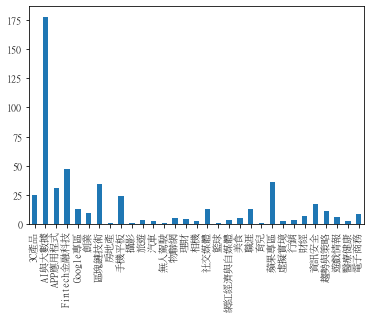

In [10]:
dict(news_list.groupby(['Classification']).count()['No.'])
grouped_news = pd.Series(dict(news_list.groupby(['Classification']).count()['No.']))
print(grouped_news)
grouped_news.plot.bar()


# 進階目標  
## Target 1  
爬下⽂章，透過  <font color=blue>jieba</font> 等斷詞將⽂文章拆解  


In [11]:
import jieba

Refer to:  

https://github.com/fxsjy/jieba  
  
https://github.com/ldkrsi/jieba-zh_TW  
  
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/32296/  

In [12]:
# use article #001.txt as example

# column #0: item No. 001 ~ 500
# column #1: subject, title
# column #2: url
# column #3: classification
# column #4: brief

dir = "articles"
filename = "001.txt"
subject = news_list.values[0][1]
print(f"Title: {subject}\n")

with open(dir + "/" + filename, 'r', encoding = "utf-8") as f:
    content = f.read()

word_seg = jieba.cut(content, cut_all = False)

word_list = []
for word in word_seg:
    word_list.append(word)
print(word_list)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\tw4690\AppData\Local\Temp\jieba.cache


Title: 淺談個性化推薦系統中的非採樣學習 | 機器之心



Loading model cost 0.843 seconds.
Prefix dict has been built succesfully.


['随着', '互联网', '技术', '和', '产业', '的', '迅速', '发展', '，', '推荐', '系统', '（', 'Recommender', ' ', 'System', '）', '成为', '网络应用', '中', '不可', '缺少', '的', '重要', '组成部分', '，', '是', '当前', '解决', '信息', '过载', '问题', '的', '最', '有效', '的', '方法', '之一', '，', '因此', '也', '受到', '了', '学界', '和', '工业界', '的', '广泛', '关注', '。', '\n', '近年来', '，', '深度', '学习', '技术', '在', '许多', '领域', '展现出', '非凡', '的', '应用', '效果', '。', '然而', '，', '现有', '的', '将', '深度', '学习', '应用', '到', '推荐', '系统', '任务', '的', '工作', '主要', '集中', '在', '探索', '和', '引入', '不同', '的', '神经网络', '框架', '，', '在', '模型', '学习', '算法', '方面', '的', '研究', '相对', '较', '少', '。', '\n', '为了', '优化', '模型', '，', '现有', '的', '工作', '往往', '使用', '负', '采样', '策略', '（', 'Negative', ' ', 'Sampling', '）', '进行', '训练', '。', '虽然', '负', '采样', '方便', '并且', '易于', '实现', '，', '但是', '许多', '最近', '的', '研究', '表明', '负', '采样', '策略', '的', '鲁棒性', '较差', '，', '可能', '会', '忽略', '掉', '重要', '的', '训练', '样', '例', '从而', '导致', '模型', '无法', '收敛', '到', '最优', '的', '状态', '。', '\n', '在', '近两年', '，', '清华大学', '信息检索', '课题组', '（', 'THU

## Target 2  
可以簡單的計算同樣文字出現的頻率或是透過 TFIDF 的統計⽅方式計算  


In [13]:
word_series = pd.Series(word_list)
word_series.value_counts()

的                126
，                 81
                  73
。                 53
）                 40
（                 40
\n                38
学习                32
是                 32
在                 23
和                 22
推荐                22
模型                19
中                 17
神经网络              15
系统                14
时间                13
训练                13
应用                12
算法                12
任务                11
基于                11
：                 11
了                 10
、                 10
一个                10
深度                 9
可以                 9
以上                 8
信息                 8
                ... 
50                 1
准确性                1
粗略地                1
rating             1
近两年                1
matrix             1
目的                 1
下                  1
语言                 1
具有                 1
可读性                1
其后                 1
art                1
清华大学               1
比                  1
Connectionist      1
空间           

## Target 3  
將經常出現的 stop words 過濾掉之後對頻率進⾏行行排名  


refer to:  
https://github.com/tomlinNTUB/Python-in-5-days/blob/master/10-2%20%E4%B8%AD%E6%96%87%E6%96%B7%E8%A9%9E-%E7%A7%BB%E9%99%A4%E5%81%9C%E7%94%A8%E8%A9%9E.md  


In [14]:
# initialize the lists
stopWords=[]
segments=[]
remainderWords=[]
word_list = []

# read the StopWords.txt
with open('stopWords.txt', 'r', encoding='utf-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

# read the file to be segmented then segment it
with open(dir + "/" + filename, 'r', encoding = "utf-8") as file:
    content = file.read()
    
segments = jieba.cut(content, cut_all=False)

remainderWords = list(filter(lambda a: a not in stopWords and a != '\n', segments))
for word in remainderWords:
    word_list.append(word)
print(word_list)

# convert word_list to Pandas.Series
word_series = pd.Series(word_list)
word_series.value_counts()


['随着', '互联网', '技术', '产业', '迅速', '发展', '推荐', '系统', 'Recommender', ' ', 'System', '成为', '网络应用', '中', '不可', '缺少', '重要', '组成部分', '当前', '解决', '信息', '过载', '问题', '有效', '方法', '学界', '工业界', '广泛', '关注', '近年来', '深度', '学习', '技术', '许多', '领域', '展现出', '非凡', '应用', '效果', '现有', '将', '深度', '学习', '应用', '推荐', '系统', '任务', '工作', '主要', '集中', '探索', '引入', '不同', '神经网络', '框架', '模型', '学习', '算法', '方面', '研究', '相对', '较', '少', '为了', '优化', '模型', '现有', '工作', '往往', '使用', '负', '采样', '策略', 'Negative', ' ', 'Sampling', '进行', '训练', '虽然', '负', '采样', '方便', '并且', '易于', '实现', '许多', '最近', '研究', '表明', '负', '采样', '策略', '鲁棒性', '较差', '可能', '会', '忽略', '掉', '重要', '训练', '样', '例', '从而', '导致', '模型', '无法', '收敛', '最优', '状态', '近两年', '清华大学', '信息检索', '课题组', 'THUIR', '首次', '探索', '将', '非', '采样', '策略', 'Non', '-', 'Sampling', ',', ' ', 'Whole', '-', 'data', ' ', 'based', ' ', 'Learning', '应用', '基于', '神经网络', '推荐', '系统', '中', '通过', '严格', '数学', '推理', '我们', '设计', '一系列', '高效', '非', '采样', '学习', '算法', '整体', '数据', '中', '学习', '时间', '复杂度', '理论', '数量级', '有所'

                 73
学习               32
推荐               22
模型               19
中                17
神经网络             15
系统               14
训练               13
时间               13
应用               12
算法               12
任务               11
基于               11
一个               10
深度                9
信息                8
机器                8
为                 7
效果                7
-                 7
一种                7
领域                7
来                 7
采样                6
主要                6
使用                6
.                 6
过滤                6
数据                6
可能                6
                 ..
现实                1
完成                1
初始                1
建立                1
类比                1
时候                1
人类                1
科技                1
清华大学              1
Connectionist     1
空间                1
搜索引擎              1
集中                1
柜                 1
factorization     1
不可                1
解码器               1
类                 1
输出                1


## Target 4  
將結果透過 wordcloud 文字雲的方式呈現  


refer to:  
https://www.itread01.com/content/1532260931.html  
  
https://medium.com/@fsflyingsoar/%E7%AD%86%E8%A8%98-for-python-jieba-wordcloud-b814f5e04e01  


随着 互联网 技术 产业 迅速 发展 推荐 系统 Recommender   System 成为 网络应用 中 不可 缺少 重要 组成部分 当前 解决 信息 过载 问题 有效 方法 学界 工业界 广泛 关注 近年来 深度 学习 技术 许多 领域 展现出 非凡 应用 效果 现有 将 深度 学习 应用 推荐 系统 任务 工作 主要 集中 探索 引入 不同 神经网络 框架 模型 学习 算法 方面 研究 相对 较 少 为了 优化 模型 现有 工作 往往 使用 负 采样 策略 Negative   Sampling 进行 训练 虽然 负 采样 方便 并且 易于 实现 许多 最近 研究 表明 负 采样 策略 鲁棒性 较差 可能 会 忽略 掉 重要 训练 样 例 从而 导致 模型 无法 收敛 最优 状态 近两年 清华大学 信息检索 课题组 THUIR 首次 探索 将 非 采样 策略 Non - Sampling ,   Whole - data   based   Learning 应用 基于 神经网络 推荐 系统 中 通过 严格 数学 推理 我们 设计 一系列 高效 非 采样 学习 算法 整体 数据 中 学习 时间 复杂度 理论 数量级 有所 降低 基于 设计 高效 非 采样 算法 框架 我们 分别 设计 不同 应用 场景 神经网络 推荐 模型 并 多个 现实 数据 集上 相比 于 已有   state - of - the - art   方法 训练 时间 模型 表现 均 取得 非常 显著 效果 包括 .   基础 场景   使用 用户 商品   ID   信息 推荐 效果 提升   %   训练 时间 快   30   倍 TOIS   录用 .   基于 社交 关系 推荐 系统 推荐 效果 提升   %   训练 时间 快     倍 SIGIR   2019   录用 .   基于 行为 数据 推荐 系统 推荐 效果 提升   40 %   训练 时间 快   10   倍 AAAI   2020   录用 .   包含 特征 feature 上下文 context 推荐 系统 推荐 效果 提升   %   训练 时间 快     倍 WWW   2020   录用 接下来 我们 简要 介绍 相关 工作 主要 内容 深度 学习 deep   learning 机器 学习

(-0.5, 399.5, 199.5, -0.5)

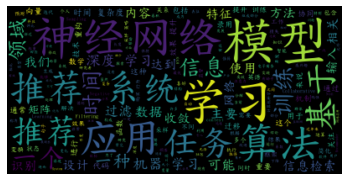

In [15]:
#from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

font_path = 'C:\Windows\Fonts/KAIU.TTF' # 標楷體

wc = WordCloud(
  background_color = 'black',        #   背景顏色
  max_words = 200,                   #   最大分詞數量
  mask = None,                       #   背景圖片
  max_font_size = None,              #   顯示字體的最大值
  stopwords = STOPWORDS.add(word),   #   使用內置的屏蔽詞，再添加一個
  font_path = font_path,             #   若為中文則需引入中文字型(.TTF)
  random_state = None,               #   隨機碼生成各分詞顏色
  prefer_horizontal = 0.9)           #   調整分詞中水平和垂直的比例

# segmented words string
wordsString = " ".join(word_list)
print(wordsString)
# Generate a word cloud image
wordcloud = wc.generate(wordsString)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
